In [7]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif

In [8]:
df = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')

In [9]:

df = df.dropna()
df.head()


,Unnamed: 0,AGE_GRP,ThirtyDay_Death,SixWeek_Death,ThreeMo_Death,SixMo_Death,NineMo_Death,OneYear_Death,Charlson_WIC,Protein 1,...,Protein 2084,Protein 2085,Protein 2086,Protein 2087,Protein 2088,Protein 2089,Protein 2090,Protein 2091,Protein 2092,Protein 2093
1,102,51-60,False,False,False,False,False,False,0.0,0.216912,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,103,51-60,False,False,False,False,False,False,2.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,105,71-80,True,True,True,True,True,True,4.0,0.224415,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,108,61-70,False,False,False,False,False,False,5.0,-0.080960,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,109,51-60,False,False,False,False,False,False,1.0,0.013984,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
df = pd.read_csv('Staphylococcus_aureus_Infection_Data.csv')
df = df.dropna()
y = df.iloc[:, 7]
y=y.astype('int')
x = df.iloc[:, df.columns != {'ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'}]
x.drop(columns=['ThirtyDay_Death', 'SixWeek_Death', 'ThreeMo_Death', 'SixMo_Death','NineMo_Death', 'OneYear_Death'], inplace=True)
x
for i in range(5547):
    if( type(x.iloc[i,1]) != type(float(0))):
        z = x.iloc[i,1][:2]
        x.iloc[i,1] = int(z)
        if(x.iloc[i,1] == 0):
            x.iloc[i,1] = 1
    else:
        x.iloc[i,1] = 1
selector = SelectKBest(f_classif, k=20)
x = selector.fit_transform(x, y)
z = 0


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [2094 2095] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [11]:
y.iloc[:]

1       0
2       0
3       1
4       0
5       0
       ..
6182    0
6183    0
6184    1
6185    0
6186    1
Name: OneYear_Death, Length: 5547, dtype: int64

In [12]:
x=x.astype('int')

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[703,  76],
       [183, 148]])

Text(0.5, 427.9555555555555, 'Predicted label')

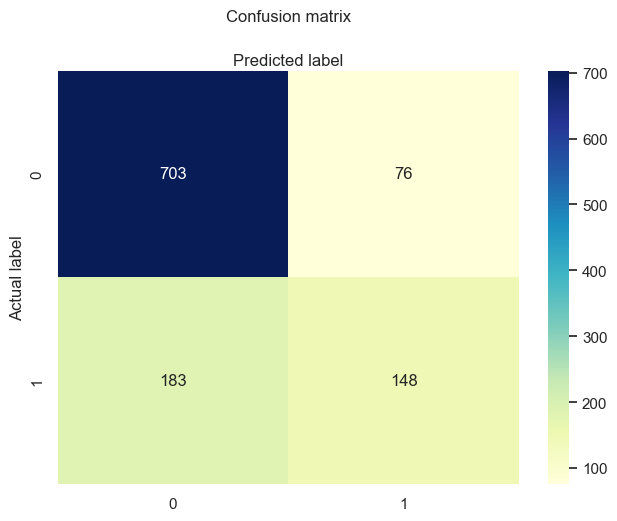

In [16]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import classification_report
print("Testing Accuracy")
target_names = ['doesn\'t die', 'dies']
print(classification_report(y_test, y_pred, target_names=target_names))
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
accuracy_score(y_test, y_pred)

Testing Accuracy
              precision    recall  f1-score   support

 doesn't die       0.79      0.90      0.84       779
        dies       0.66      0.45      0.53       331

    accuracy                           0.77      1110
   macro avg       0.73      0.67      0.69      1110
weighted avg       0.75      0.77      0.75      1110



0.7666666666666667

In [22]:
y_pred_train= logreg.predict(x_train)
print("Training Accuracy")
accuracy_score(y_pred_train, y_train)

Training Accuracy


0.7498309668695065